In [1]:
# ====================================================
#1.IMPORTING REQUIRED LIBRARIES.
# ====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:

# ---------------------------------------------------------------
# 📂 Step 1: Load Dataset
# ---------------------------------------------------------------
data = pd.read_csv("bank-full.csv")
print("✅ Data Loaded Successfully!")
print("Shape of the data:", data.shape)
data.head(5)



✅ Data Loaded Successfully!
Shape of the data: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# ---------------------------------------------------------------
# 🔍 Step 2: Exploring  the Dataset
# ---------------------------------------------------------------
print(data.info())
print("\n🔹 Missing Values:\n", data.isnull().sum(),)
print("\n🔹 Target Variable Distribution:\n", data['y'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

🔹 Missing Values:
 age          0
job          0
marital      0
education    0
default      0

In [4]:
# ---------------------------------------------------------------
# 🧹 Step 3: Data Preprocessing
# ---------------------------------------------------------------
# Convert categorical variables into dummy variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (x) and target (y)
x = data_encoded.iloc[:,:-1]
y = data_encoded['y_yes']

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data Preprocessed Successfully!\n")
print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)

✅ Data Preprocessed Successfully!

Training Data Shape: (36168, 42)
Test Data Shape: (9043, 42)


In [5]:
# ---------------------------------------------------------------
# 🌳 Step 4: Train Decision Tree Classifier
# ---------------------------------------------------------------
model = DecisionTreeClassifier(criterion='entropy',  # measure for information gain
    max_depth=5,
    random_state=42
)

model.fit(x_train, y_train)
print("✅ Decision Tree Model Trained Successfully!")


✅ Decision Tree Model Trained Successfully!


✅ Model Accuracy: 89.86%

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.94      7985
        True       0.63      0.32      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043



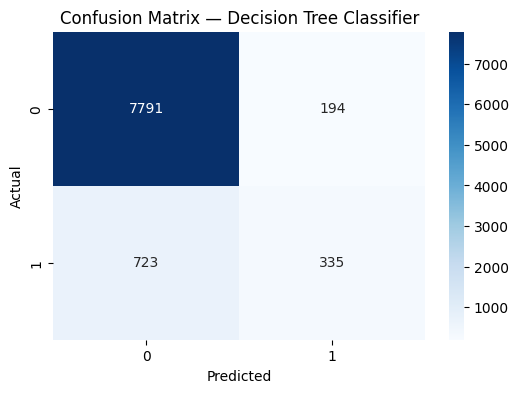

<Figure size 640x480 with 0 Axes>

In [6]:
# ---------------------------------------------------------------
# 📊 Step 5: Evaluate the Model
# ---------------------------------------------------------------
y_pred = model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2%}")

# Classification report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig("snapshot-3.jpg")


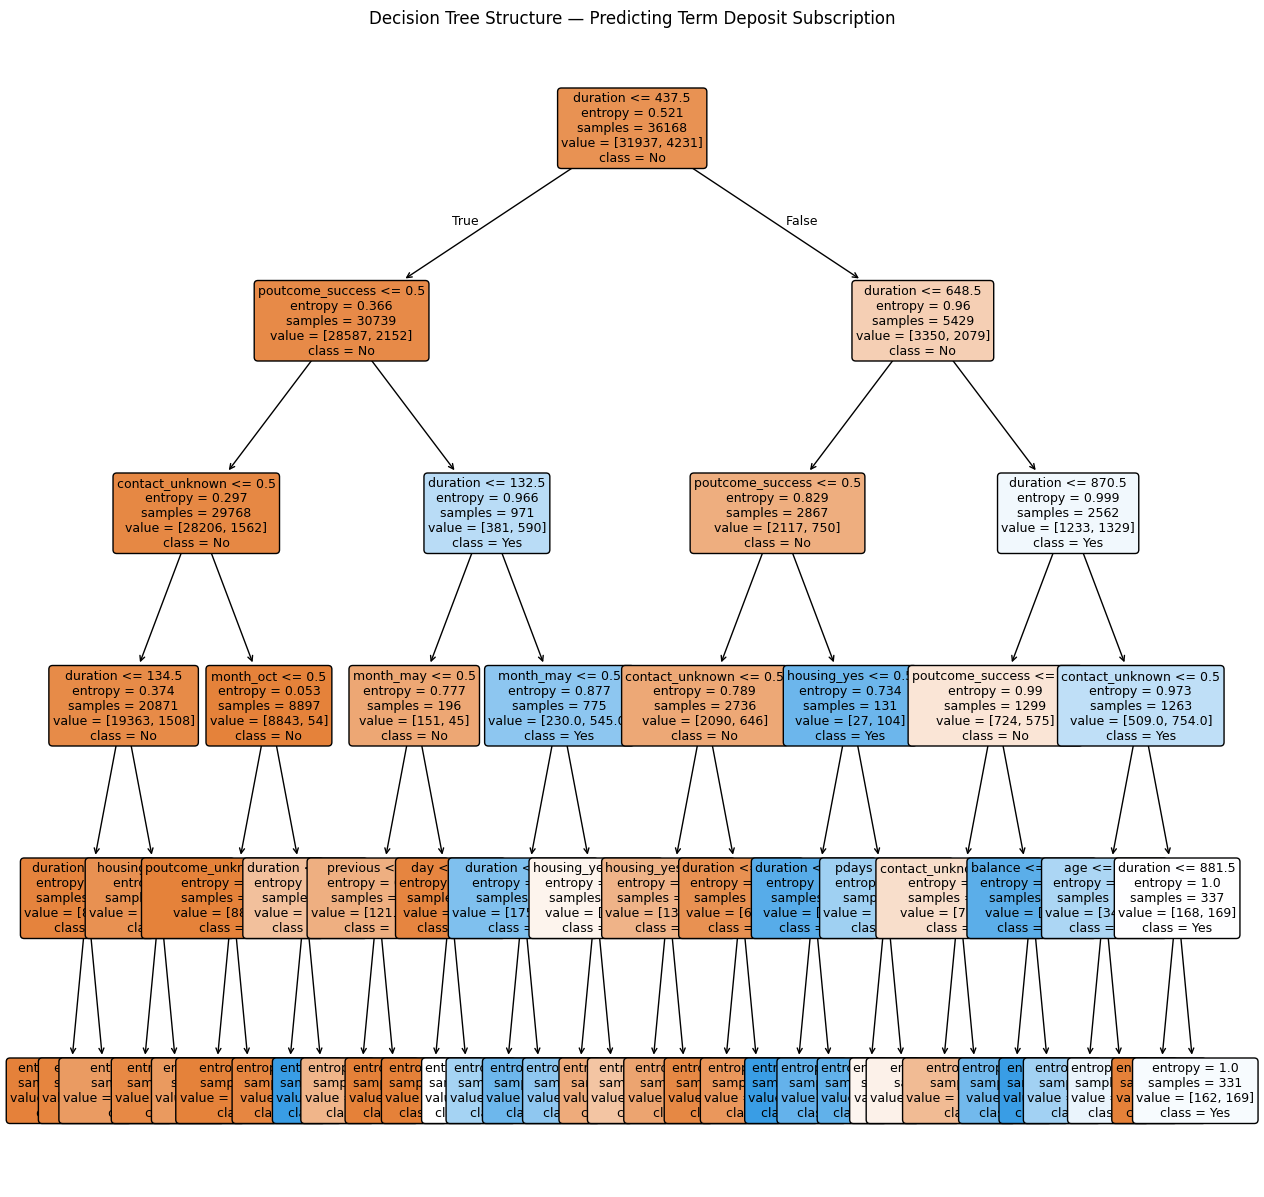

In [7]:
# ---------------------------------------------------------------
# 🌲 Step 6: Visualize the Decision Tree
# ---------------------------------------------------------------
plt.figure(figsize=(15,15))
plot_tree(
    model,
    filled=True,
    impurity  = True,
    feature_names=x.columns,
    class_names=['No', 'Yes'],
    rounded=True,
    fontsize=9
)
plt.savefig("snapshot-1.jpg")
plt.title("Decision Tree Structure — Predicting Term Deposit Subscription")
plt.show()


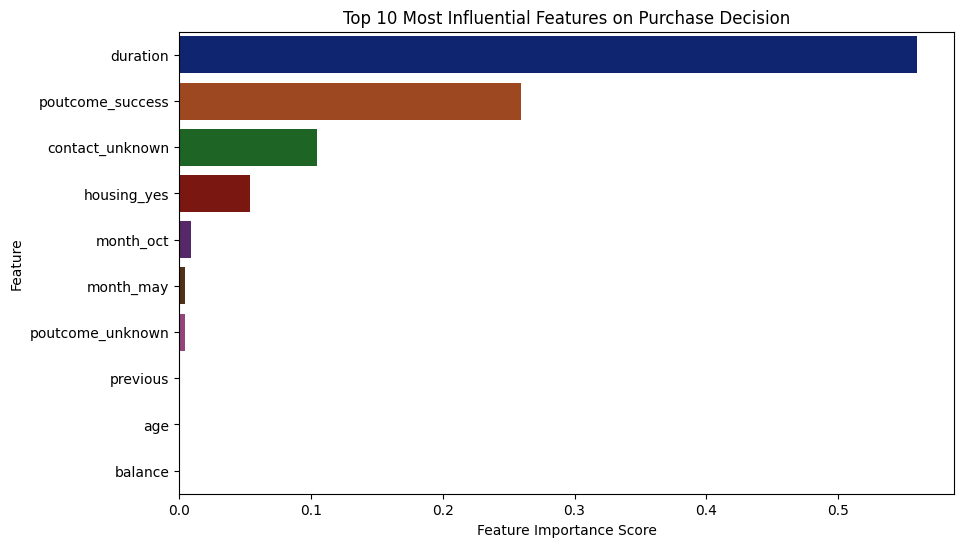


📊 Top Influencing Features:
 duration            0.559897
poutcome_success    0.259779
contact_unknown     0.104353
housing_yes         0.053588
month_oct           0.009175
month_may           0.004448
poutcome_unknown    0.004397
previous            0.001052
age                 0.000970
balance             0.000861
dtype: float64


<Figure size 640x480 with 0 Axes>

In [8]:
# ---------------------------------------------------------------
# 💡 Step 7: Feature Importance
# ---------------------------------------------------------------
importances = pd.Series(model.feature_importances_, index=x.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index, palette='dark')
plt.title("Top 10 Most Influential Features on Purchase Decision")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

print("\n📊 Top Influencing Features:\n", top_features)
plt.savefig("snapshot-2.jpg")
